In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install soccerdata

In [ ]:
import soccerdata as sd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import unidecode
import seaborn as sns
from sklearn.linear_model import LinearRegression
from fuzzywuzzy import process

In [19]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [20]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[10/20/24 17:46:05] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=145903;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=845575;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [21]:
team_season_stats = fbref.read_team_season_stats(stat_type="passing")
team_season_stats.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used 90s  Total               \
                                                        Cmp    Att  Cmp%   
league      season team                                                    
BRA-Serie A 2425   Ath Paranaense             30  28  10342  13075  79.1   
                   Atl Goianiense             40  30   9847  12731  77.3   
                   Atlético Mineiro           35  29  13239  15843  83.6   
                   Bahia                      27  30  14505  17024  85.2   
                   Botafogo (RJ)              37  30  11892  14557  81.7   

                                                    Short              ...  \
                                    TotDist PrgDist   Cmp   Att  Cmp%  ...   
league      season team                                                ...   
BRA-Serie A 2425   Ath Paranaense    193508   69817  4195  4793  87.5  ...   
                   Atl Goianiense    188113   70941  3914  4569  85.7  ...   
                   Atlético Mineiro  235956   78638  5902  6516  90.6  ...   
                   Bahia             246890   84263  6601  7215  91.5  ...   
                   Botafogo (RJ)     220953   81881  4816  5469  88.1  ...   

                                    Ast   xAG Expected         KP   1/3  PPA  \
                                                    xA A-xAG                   
league      season team                                                        
BRA-Serie A 2425   Ath Paranaense    24  28.8     28.4  -4.8  339   951  248   
                   Atl Goianiense    12  22.3     24.7 -10.3  320  1016  225   
                   Atlético Mineiro  21  21.0     26.1   0.0  285  1096  239   
                   Bahia             33  31.7     29.1   1.3  316  1100  262   
                   Botafogo (RJ)     32  30.7     29.0   1.3  334  1062  248   

                                    CrsPA  PrgP  \
                                                  
league      season team                           
BRA-Serie A 2425   Ath Paranaense      77  1192   
                   Atl Goianiense      88  1156   
                   Atlético Mineiro    72  1264   
                   Bahia               72  1336   
                   Botafogo (RJ)       70  1244   

                                                                                url  
                                                                                     
league      season team                                                              
BRA-Serie A 2425   Ath Paranaense    /en/squads/2091c619/Athletico-Paranaense-Stats  
                   Atl Goianiense     /en/squads/32d508ca/Atletico-Goianiense-Stats  
                   Atlético Mineiro      /en/squads/422bb734/Atletico-Mineiro-Stats  
                   Bahia                            /en/squads/157b7fee/Bahia-Stats  
                   Botafogo (RJ)              /en/squads/d9fdd9d9/Botafogo-RJ-Stats  

[5 rows x 26 columns]

In [22]:
print(team_season_stats.columns)


MultiIndex([('players_used',        ''),
            (         '90s',        ''),
            (       'Total',     'Cmp'),
            (       'Total',     'Att'),
            (       'Total',    'Cmp%'),
            (       'Total', 'TotDist'),
            (       'Total', 'PrgDist'),
            (       'Short',     'Cmp'),
            (       'Short',     'Att'),
            (       'Short',    'Cmp%'),
            (      'Medium',     'Cmp'),
            (      'Medium',     'Att'),
            (      'Medium',    'Cmp%'),
            (        'Long',     'Cmp'),
            (        'Long',     'Att'),
            (        'Long',    'Cmp%'),
            (         'Ast',        ''),
            (         'xAG',        ''),
            (    'Expected',      'xA'),
            (    'Expected',   'A-xAG'),
            (          'KP',        ''),
            (         '1/3',        ''),
            (         'PPA',        ''),
            (       'CrsPA',        ''),
            (   

In [23]:
player_season_stats = fbref.read_player_season_stats(stat_type="standard")
player_season_stats.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-019   
                                  Alex Santana        BRA  MF,FW  29-160   
                                  Bento               BRA     GK  25-132   
                                  Bruno Praxedes      BRA     MF  22-255   
                                  Bruno Zapelli       ARG  MF,FW  22-156   

                                                    born Playing Time         \
                                                                   MP Starts   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998           17     13   
                                  Alex Santana      1995            4      0   
                                  Bento             1999            7      7   
                                  Bruno Praxedes    2002            5      1   
                                  Bruno Zapelli     2002           25     15   

                                                               Performance  \
                                                     Min   90s         Gls   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1065  11.8           4   
                                  Alex Santana       101   1.1           0   
                                  Bento              630   7.0           0   
                                  Bruno Praxedes     148   1.6           0   
                                  Bruno Zapelli     1205  13.4           0   

                                                        ... Per 90 Minutes  \
                                                   Ast  ...            Gls   
league      season team           player                ...                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   1  ...           0.34   
                                  Alex Santana       0  ...            0.0   
                                  Bento              0  ...            0.0   
                                  Bruno Praxedes     0  ...            0.0   
                                  Bruno Zapelli      3  ...            0.0   

                                                                             \
                                                     Ast   G+A  G-PK G+A-PK   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.08  0.42  0.34   0.42   
                                  Alex Santana       0.0   0.0   0.0    0.0   
                                  Bento              0.0   0.0   0.0    0.0   
                                  Bruno Praxedes     0.0   0.0   0.0    0.0   
                                  Bruno Zapelli     0.22  0.22   0.0   0.22   

                                                                             \
                                                      xG   xAG xG+xAG  npxG   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.27  0.19   0.45  0.27   
                                  Alex Santana      0.06   0.0   0.06  0.06   
                                  Bento              0.0   0.0    0.0   0.0   
                                  Bruno Praxedes    0.05  0.19   0.24  0.05   
                                  Bruno Zapelli     0.19  0.28   0.47  0.19   

                                                             
                                                   npxG+xAG  
league      season team           player                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     0.45  
                                  Ale

In [24]:
print(player_season_stats.columns)

MultiIndex([(        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',      'xAG'),
            (      'Expected', 'npxG+xAG'),
            (   'Progression',     'PrgC'),
            (   'Progression',     'PrgP'),
            (   'Progression',  

In [25]:
sofascore = sd.Sofascore(leagues='BRA-Serie A', seasons='24')
print(sofascore.__doc__)

[10/20/24 17:46:18] INFO     Saving cached data to /root/soccerdata/data/Sofascore                   ]8;id=774306;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=468744;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data available at http://www.sofascore.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/Sofascore``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of Leagues to include.
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - 'tor': Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
                      'https': 'http://10.10.1.10:1080',
                  }

            - 

In [27]:
league_table = sofascore.read_league_table()
league_table.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


team  MP   W  D   L  GF  GA  GD  Pts
league      season                                           
BRA-Serie A 2425     Botafogo  30  18  7   5  48  26  22   61
            2425    Palmeiras  29  17  6   6  46  20  26   57
            2425    Fortaleza  30  16  8   6  39  30   9   56
            2425     Flamengo  29  15  6   8  45  34  11   51
            2425    São Paulo  30  15  5  10  41  32   9   50

In [11]:
def get_market_values(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Verifica se houve erro na requisição
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return pd.DataFrame()  # Retorna DataFrame vazio em caso de erro

    soup = BeautifulSoup(response.content, 'html.parser')

    # Listas para armazenar os dados
    clubes = []
    valores = []

    # Encontrar a tabela com os clubes e valores de mercado
    table = soup.find('table', {'class': 'items'})

    if not table:
        print("Tabela não encontrada.")
        return pd.DataFrame()  # Retorna DataFrame vazio se a tabela não for encontrada

    # Extrair nome do clube e valor de mercado
    rows = table.find_all('tr', {'class': ['odd', 'even']})
    for row in rows:
        try:
            clube = row.find('td', {'class': 'hauptlink'}).text.strip()
            valor = row.find_all('td', {'class': 'rechts'})[1].text.strip()

            # Tratamento do valor de mercado
            valor = valor.lower().replace('€', '').replace('mi', '').replace('.', '').replace(',', '.').strip()
            valor_float = float(valor)  # Escala para milhões

            clubes.append(clube)
            valores.append(valor_float)
        except (AttributeError, IndexError, ValueError) as e:
            print(f"Erro ao processar a linha: {e}")
            continue  # Ignora a linha em caso de erro e continua o scraping

        # Adicionar delay para evitar bloqueios (entre 3 e 6 segundos)
        time.sleep(random.uniform(3, 6))

    # Retornar os dados como DataFrame
    df = pd.DataFrame({'Clube': clubes, 'Valor de Mercado (€)': valores})
    return df

# URL da página da Série A no Transfermarkt
url = 'https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1'

# Executar a função e exibir os dados
df_clubes = get_market_values(url)
print(df_clubes)


                   Clube  Valor de Mercado (€)
0            CR Flamengo                212.10
1           SE Palmeiras                209.85
2            Botafogo FR                136.50
3           São Paulo FC                105.55
4         SC Corinthians                105.20
5       Atlético Mineiro                105.10
6            Grêmio FBPA                 95.30
7          Fluminense FC                 82.05
8            Cruzeiro EC                 80.85
9               EC Bahia                 77.25
10      CR Vasco da Gama                 76.18
11         RB Bragantino                 75.40
12      SC Internacional                 73.60
13  Athletico Paranaense                 56.40
14          Fortaleza EC                 45.15
15             Cuiabá EC                 26.70
16            EC Vitória                 24.18
17   Atlético Goianiense                 23.35
18           Criciúma EC                 21.63
19          EC Juventude                 19.55


In [28]:
# Verificar os Nomes dos Clubes
df_teams = league_table
print("Clubes no Sofascore:")
print(df_teams['team'].unique())

print("\nClubes no Transfermarkt:")
print(df_clubes['Clube'].unique())

Clubes no Sofascore:
['Botafogo' 'Palmeiras' 'Fortaleza' 'Flamengo' 'São Paulo' 'Internacional'
 'Bahia' 'Cruzeiro' 'Atlético Mineiro' 'Vasco' 'Criciúma' 'Grêmio'
 'Red Bull Bragantino' 'Juventude' 'Fluminense' 'Vitória' 'Corinthians'
 'Athletico' 'Cuiabá' 'Atlético Goianiense']

Clubes no Transfermarkt:
['cr flamengo' 'se palmeiras' 'botafogo fr' 'são paulo fc'
 'sc corinthians' 'atlético mineiro' 'grêmio fbpa' 'fluminense fc'
 'cruzeiro ec' 'ec bahia' 'cr vasco da gama' 'rb bragantino'
 'sc internacional' 'athletico paranaense' 'fortaleza ec' 'cuiabá ec'
 'ec vitória' 'atlético goianiense' 'criciúma ec' 'ec juventude']


In [37]:
# Função para encontrar correspondências aproximadas
def padronizar_nome(nome, lista_nomes):
    nome_padronizado, score = process.extractOne(nome, lista_nomes)
    if score >= 80:  # Considera como match se a similaridade for alta
        return nome_padronizado
    return None

# Aplicar fuzzy matching para padronizar nomes
df_teams['team_mapeado_fuzzy'] = df_teams['team'].apply(
    lambda x: padronizar_nome(x, df_clubes['Clube'].unique())
).fillna(df_teams['team'])

# Verificar se a padronização ocorreu corretamente
print("\nClubes mapeados:")
print(df_teams[['team', 'team_mapeado_fuzzy']].head())

# Tentar unir os DataFrames
df = pd.merge(df_teams, df_clubes, left_on='team_mapeado_fuzzy', right_on='Clube', how='inner')

# Verificar o DataFrame resultante
print("\nPrimeiras linhas do DataFrame após o merge:")
print(df.head())

# Garantir que as colunas necessárias existem antes de calcular a eficiência
if 'Pts' in df.columns and 'Valor de Mercado (€)' in df.columns:
    df['eficiencia'] = df['Pts'] / df['Valor de Mercado (€)']
else:
    print("\nErro: Colunas necessárias para calcular a eficiência não encontradas.")

# Exibir o DataFrame final
print("\nDados Integrados:")
print(df[['team_mapeado_fuzzy', 'Pts', 'Valor de Mercado (€)', 'eficiencia']])

# Ordenar por eficiência em ordem decrescente, se disponível
if 'eficiencia' in df.columns:
    df = df.sort_values(by='eficiencia', ascending=False)
    print("\nDados Ordenados por Eficiência:")
    print(df[['team_mapeado_fuzzy', 'Pts', 'Valor de Mercado (€)', 'eficiencia']])
else:
    print("\nEficiência não pode ser calculada devido a colunas ausentes.")



Clubes mapeados:
                         team team_mapeado_fuzzy
league      season                              
BRA-Serie A 2425     botafogo        botafogo fr
            2425    palmeiras       se palmeiras
            2425    fortaleza       fortaleza ec
            2425     flamengo        cr flamengo
            2425    são paulo       são paulo fc

Primeiras linhas do DataFrame após o merge:
        team  MP   W  D   L  GF  GA  GD  Pts team_mapeado team_mapeado_fuzzy  \
0   botafogo  30  18  7   5  48  26  22   61     botafogo        botafogo fr   
1  palmeiras  29  17  6   6  46  20  26   57    palmeiras       se palmeiras   
2  fortaleza  30  16  8   6  39  30   9   56    fortaleza       fortaleza ec   
3   flamengo  29  15  6   8  45  34  11   51     flamengo        cr flamengo   
4  são paulo  30  15  5  10  41  32   9   50    são paulo       são paulo fc   

          Clube  Valor de Mercado (€) Clube Padronizado  
0   botafogo fr                136.50          Botafogo

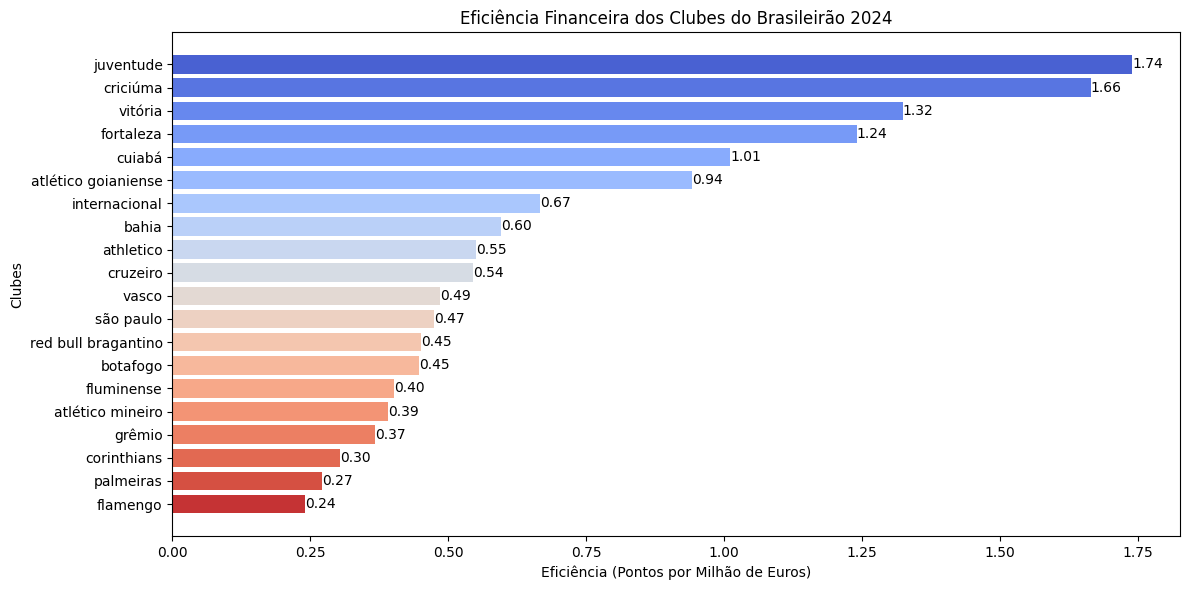

In [38]:
# Criar uma paleta de cores baseada na eficiência
cores = sns.color_palette("coolwarm", len(df))

# Gerar o gráfico com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(df['team'], df['eficiencia'], color=cores)
plt.barh(df['team'], df['eficiencia'], color=cores)
plt.xlabel('Eficiência (Pontos por Milhão de Euros)')
plt.ylabel('Clubes')
plt.title('Eficiência Financeira dos Clubes do Brasileirão 2024')

# Adicionar anotações em cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [39]:
correlacao = df[['Pts', 'Valor de Mercado (€)']].corr()
print("Correlação entre Pontos e Valor de Mercado:")
print(correlacao)


Correlação entre Pontos e Valor de Mercado:
                           Pts  Valor de Mercado (€)
Pts                   1.000000              0.637363
Valor de Mercado (€)  0.637363              1.000000


Correlação positiva (0.637):
Isso sugere que, em geral, clubes com maior valor de mercado tendem a conquistar mais pontos, mas essa relação não é perfeita.

Correlação moderada:
Embora exista uma tendência positiva, outros fatores além do valor de mercado influenciam os pontos conquistados (como a gestão, técnico, planejamento e desempenho dos jogadores em campo).

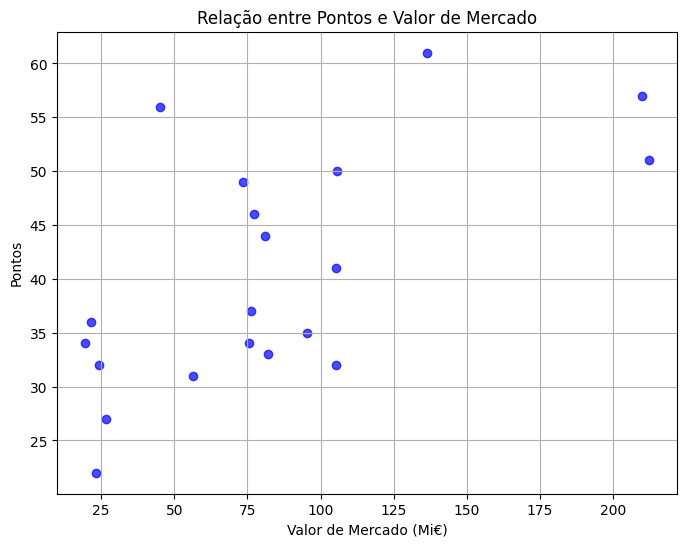

In [40]:
# Gráfico de dispersão entre pontos e valor de mercado
plt.figure(figsize=(8, 6))
plt.scatter(df['Valor de Mercado (€)'], df['Pts'], color='blue', alpha=0.7)
plt.title('Relação entre Pontos e Valor de Mercado')
plt.xlabel('Valor de Mercado (Mi€)')
plt.ylabel('Pontos')
plt.grid(True)
plt.show()


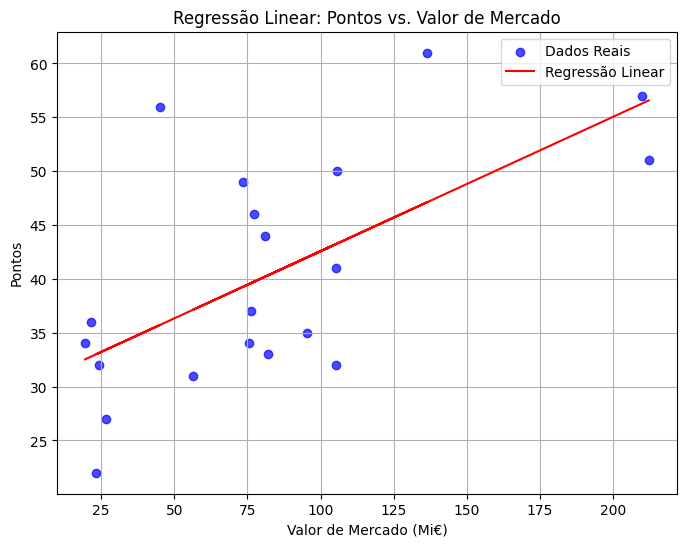

Coeficiente da Regressão: 0.12
Intercepto: 30.09


In [41]:
# Preparar os dados
X = df[['Valor de Mercado (€)']].values
y = df['Pts'].values

# Ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer previsões
y_pred = modelo.predict(X)

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Dados Reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.title('Regressão Linear: Pontos vs. Valor de Mercado')
plt.xlabel('Valor de Mercado (Mi€)')
plt.ylabel('Pontos')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente da Regressão: {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")


In [42]:
r2 = modelo.score(X, y)
print(f"R²: {r2:.2f}")

R²: 0.41


O valor de R² = 0.41 indica que o modelo de regressão linear explica 41% da variação nos pontos dos clubes com base no valor de mercado. Isso sugere que o valor de mercado tem alguma influência no desempenho dos clubes, mas 59% da variação nos pontos é explicada por outros fatores.

In [47]:
# Adicionar Variáveis Explicativas que possam melhorar o modelo

# Selecionar as colunas relevantes do league_table
df_teams = league_table[['team', 'GF', 'GA', 'Pts']].copy()

# Renomear as colunas para facilitar a leitura
df_teams = df_teams.rename(columns={
    'GF': 'gols_marcados',
    'GA': 'gols_sofridos',
    'Pts': 'pontos'
})

# Adicionar nova variável explicativa: saldo de gols
df_teams['saldo_gols'] = df_teams['gols_marcados'] - df_teams['gols_sofridos']

# Exibir uma amostra dos dados com as variáveis explicativas
print("\nAmostra dos Dados:")
print(df_teams.head())



Amostra dos Dados:
                         team  gols_marcados  gols_sofridos  pontos  \
league      season                                                    
BRA-Serie A 2425     botafogo             48             26      61   
            2425    palmeiras             46             20      57   
            2425    fortaleza             39             30      56   
            2425     flamengo             45             34      51   
            2425    são paulo             41             32      50   

                    saldo_gols  
league      season              
BRA-Serie A 2425            22  
            2425            26  
            2425             9  
            2425            11  
            2425             9  


In [43]:
#Adicionar Variáveis Explicativas que possam melhorar o modelo
# Selecionar as colunas relevantes do league_table
df_teams = league_table[['team', 'GF', 'GA', 'Pts']].copy()

# Renomear as colunas para facilitar a leitura
df_teams = df_teams.rename(columns={'GF': 'gols_marcados', 'GA': 'gols_sofridos', 'Pts': 'pontos'})

# Exibir uma amostra dos dados
print(df_teams.head())


                         team  gols_marcados  gols_sofridos  pontos
league      season                                                 
BRA-Serie A 2425     botafogo             48             26      61
            2425    palmeiras             46             20      57
            2425    fortaleza             39             30      56
            2425     flamengo             45             34      51
            2425    são paulo             41             32      50


In [57]:
# Definir as variáveis independentes (X) e a variável dependente (y)
X2 = df[['Valor de Mercado (€)', 'gols_marcados', 'gols_sofridos']]
y2 = df['pontos']

# Treinar o modelo de regressão linear
modelo2 = LinearRegression()
modelo2.fit(X2, y2)
#fazer previsoes
y_pred2 = modelo2.predict(X)

# Exibir os coeficientes da regressão
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")

# Avaliar o modelo com R²
r2 = modelo.score(X, y)
print(f"R²: {r2:.2f}")


Coeficientes: [ 0.21972503  0.05106759 -0.01343884]
Intercepto: 16.377558905441845
R²: 1.00


In [59]:
# Clubes não combinados do Sofascore
clubes_nao_mapeados_sofascore = df_teams[~df_teams['team'].isin(df['team'])]
print("\nClubes do Sofascore não combinados:")
print(clubes_nao_mapeados_sofascore['team'].unique())

# Clubes não combinados do Transfermarkt
clubes_nao_mapeados_transfermarkt = df_clubes[~df_clubes['Clube'].isin(df['Clube'])]
print("\nClubes do Transfermarkt não combinados:")
print(clubes_nao_mapeados_transfermarkt['Clube'].unique())



Clubes do Sofascore não combinados:
['botafogo' 'palmeiras' 'fortaleza' 'flamengo' 'são paulo' 'internacional'
 'bahia' 'cruzeiro' 'vasco' 'criciúma' 'grêmio' 'red bull bragantino'
 'juventude' 'fluminense' 'vitória' 'corinthians' 'athletico' 'cuiabá']

Clubes do Transfermarkt não combinados:
['cr flamengo' 'se palmeiras' 'botafogo fr' 'são paulo fc'
 'sc corinthians' 'grêmio fbpa' 'fluminense fc' 'cruzeiro ec' 'ec bahia'
 'cr vasco da gama' 'rb bragantino' 'sc internacional'
 'athletico paranaense' 'fortaleza ec' 'cuiabá ec' 'ec vitória'
 'criciúma ec' 'ec juventude']


In [63]:
from fuzzywuzzy import process

# Função para encontrar correspondências aproximadas
def padronizar_nome(nome, lista_nomes):
    nome_padronizado, score = process.extractOne(nome, lista_nomes)
    if score >= 80:  # Considerar correspondências com score >= 80
        return nome_padronizado
    return None

# Aplicar fuzzy matching aos nomes dos clubes do Sofascore
df_teams['team_padronizado'] = df_teams['team'].apply(
    lambda x: padronizar_nome(x, df_clubes['Clube'].unique())
).fillna(df_teams['team'])

# Realizar a união dos DataFrames com nomes padronizados
df = pd.merge(
    df_teams,
    df_clubes,
    left_on='team_padronizado',
    right_on='Clube',
    how='inner'
)

# Verificar o DataFrame após a união
print("\nTimes combinados corretamente:")
print(df[['team_padronizado', 'pontos', 'Valor de Mercado (€)']])

# Definir as variáveis independentes e a variável dependente
X2 = df[['Valor de Mercado (€)', 'gols_marcados', 'gols_sofridos']]
y2 = df['pontos']

# Treinar o modelo de regressão linear
modelo2 = LinearRegression()
modelo2.fit(X2, y2)

# Fazer previsões
df['pontos_previstos'] = modelo2.predict(X2)

# Avaliar o modelo
r2 = modelo2.score(X2, y2)
print(f"\nR²: {r2:.2f}")
# Exibir os coeficientes da regressão
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")
# Exibir os times com pontos reais e previstos
print("\nTimes Avaliados e Pontos Previstos:")
print(df[['team_padronizado', 'pontos', 'pontos_previstos']])


Times combinados corretamente:
        team_padronizado  pontos  Valor de Mercado (€)
0            botafogo fr      61                136.50
1           se palmeiras      57                209.85
2           fortaleza ec      56                 45.15
3            cr flamengo      51                212.10
4           são paulo fc      50                105.55
5       sc internacional      49                 73.60
6               ec bahia      46                 77.25
7            cruzeiro ec      44                 80.85
8       atlético mineiro      41                105.10
9       cr vasco da gama      37                 76.18
10           criciúma ec      36                 21.63
11           grêmio fbpa      35                 95.30
12         rb bragantino      34                 75.40
13          ec juventude      34                 19.55
14         fluminense fc      33                 82.05
15            ec vitória      32                 24.18
16        sc corinthians      32 

## Coeficientes:
### Valor de Mercado (€):
Coeficiente: 0.2197

Para cada aumento de 1 milhão de euros no valor de mercado, espera-se um aumento de aproximadamente 0.22 pontos.
### Gols Marcados:
Coeficiente: 0.0511

Cada gol a mais contribui com 0.05 pontos para o time.

### Gols Sofridos:
Coeficiente: -0.0134

Cada gol sofrido reduz 0.013 pontos. Esse impacto negativo faz sentido, pois quanto mais gols o time sofre, menor tende a ser sua performance.


### Intercepto: 16.38

Este valor representa o número de pontos previstos para um time com todas as variáveis independentes iguais a zero (ou seja, no ponto de origem do modelo). Embora não tenha um significado prático direto, ele é necessário para ajustar a linha de regressão.

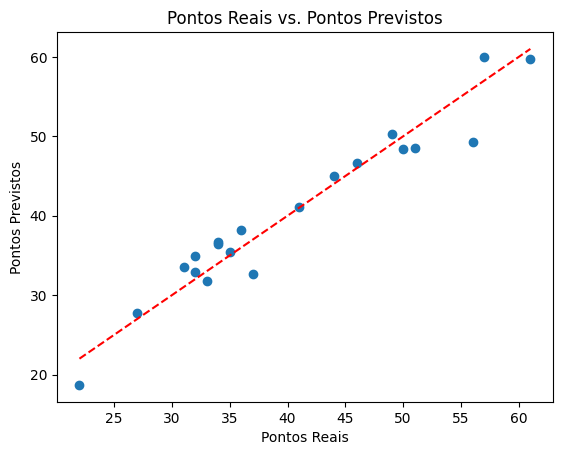

In [64]:
plt.scatter(df['pontos'], df['pontos_previstos'])
plt.plot([df['pontos'].min(), df['pontos'].max()], [df['pontos'].min(), df['pontos'].max()], 'r--')
plt.xlabel('Pontos Reais')
plt.ylabel('Pontos Previstos')
plt.title('Pontos Reais vs. Pontos Previstos')
plt.show()
